In [ ]:
!pip install pandas;seaborn;matplotlib


/bin/bash: line 1: seaborn: command not found
/bin/bash: line 1: matplotlib: command not found


# 📺 Netflix Content Analysis: Exploring Patterns and Insights from Streaming Data

Created by [Soumodey](https://github.com/soumodey)

# 🎬 Netflix Content Analysis: A Data-Driven Exploration of Streaming Trends

## 📊 A Data Science Project Using Python, Pandas, and Seaborn

### 👨‍💻 By [Soumodeep Dey]

---

### 🧾 Overview

This project analyzes publicly available Netflix data to uncover key patterns and trends in global streaming content. Using Python and data visualization tools, we explore:

- The growth of Netflix's content library over time
- Distribution of Movies vs TV Shows
- Genre and country-wise content analysis
- Most frequent directors and release years

The goal is to practice core data science skills—data cleaning, exploratory analysis, and visualization—by applying them to a real-world dataset in a time-constrained (2-day) project.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#checking the source drive
!ls&&pwd

drive  sample_data
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
df=pd.read_csv('netflix_titles.csv')
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📦 Dataset Description

- **Rows:** ~8800+
- **Columns:** 12
- **Main Columns:**
  - `type`: Movie or TV Show
  - `title`: Name of the title
  - `director`, `cast`, `country`
  - `date_added`: Date when added to Netflix
  - `release_year`
  - `rating`, `duration`
  - `listed_in`: Genre(s)



## 🧹 Data Cleaning Steps

- Converted `date_added` to datetime format.
- Removed rows with missing `date_added`.
- Filled missing values in `country` with "Unknown".
- Extracted `year_added` for time-based analysis.



In [ ]:
#checking the number of null values and replace them.
df.isnull().sum()
df['country']=df['country'].fillna('unknown')

df=df.dropna(subset=['date_added'])
df['date_added']=pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


In [ ]:
#saving the clean data to csv
df.to_csv("clean_netflix1.csv",index=False)

/tmp/ipython-input-30-3342527484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type',data=df,palette='rainbow')


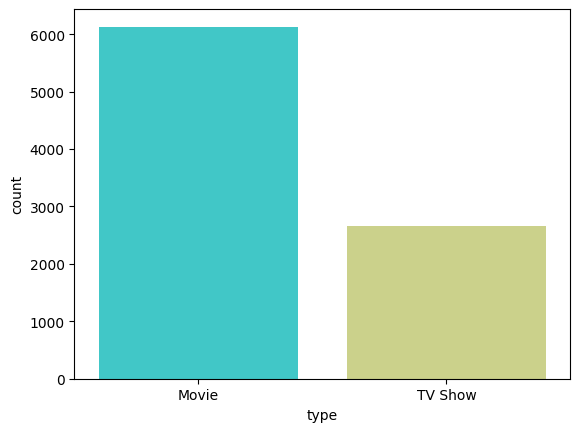

In [ ]:
#plotting moives vs tv shows in graphs
sns.countplot(x='type',data=df,palette='rainbow')

plt.savefig("movies_vs_webseries.png")

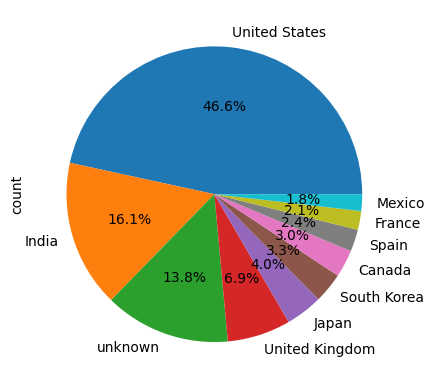

In [ ]:
#TOP CONTRIES
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='pie', autopct='%1.1f%%')
plt.savefig("Countries.png")

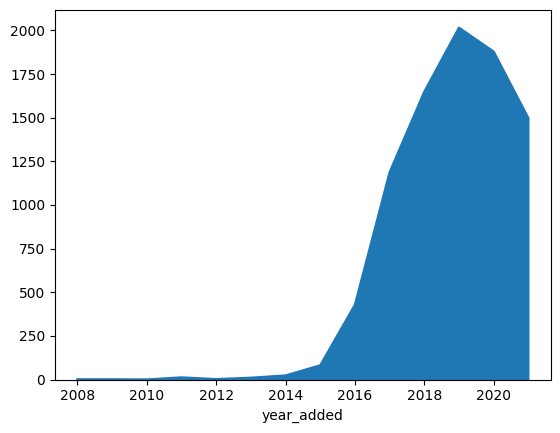

In [ ]:
df['year_added'].value_counts().sort_index().plot(kind='area')
plt.savefig("chart_name.png")

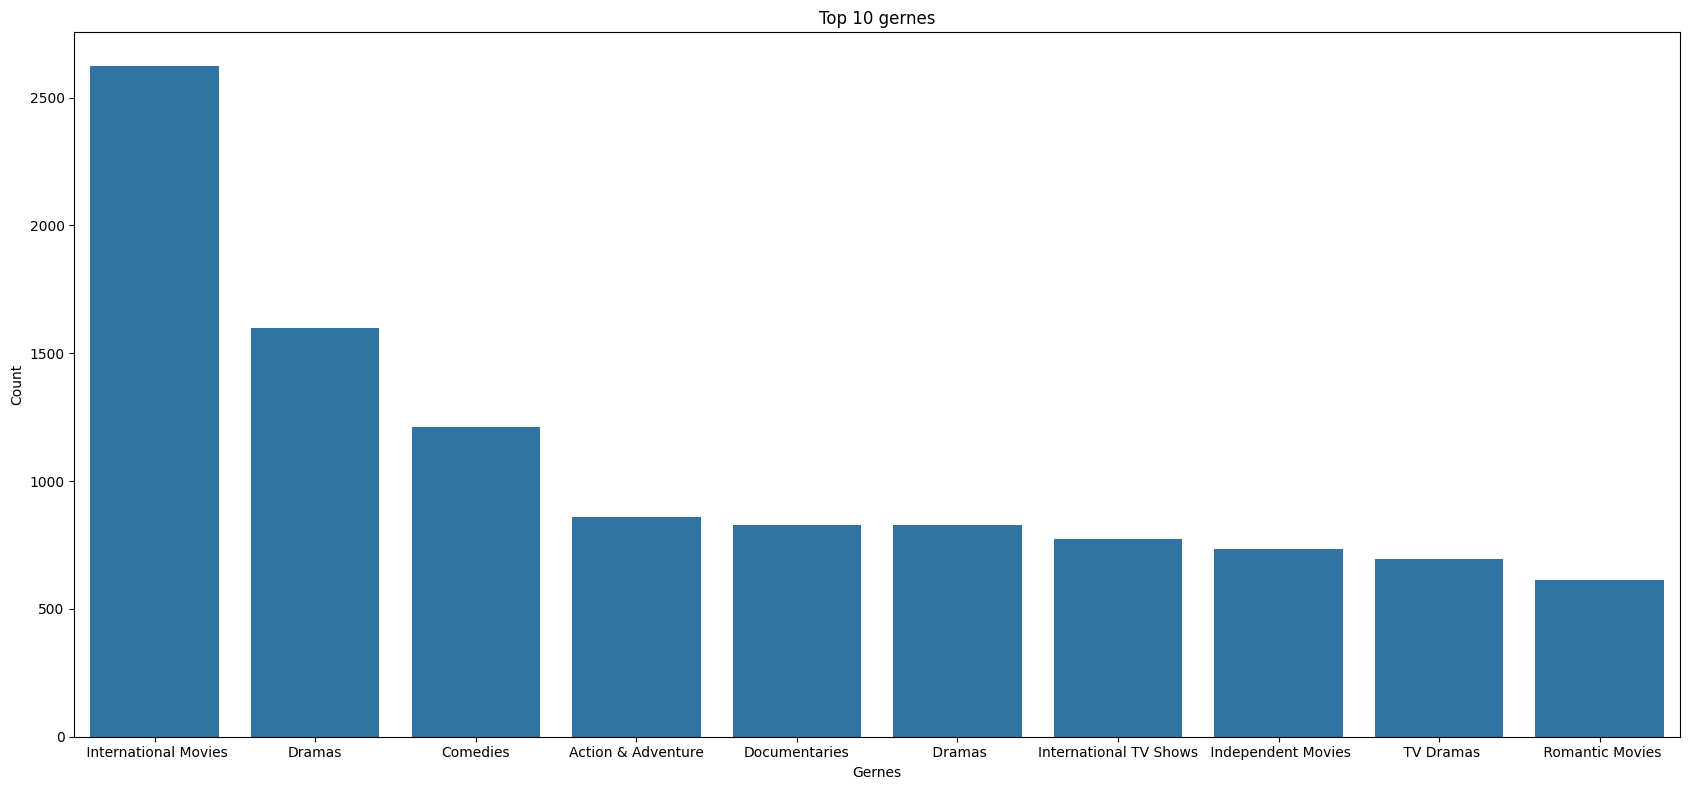

In [ ]:
#top gernes plotting
top_gernes=df['listed_in'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(17,8))
sns.barplot(x=top_gernes.index,y=top_gernes.values)
plt.title('Top 10 gernes')
plt.xlabel('Gernes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


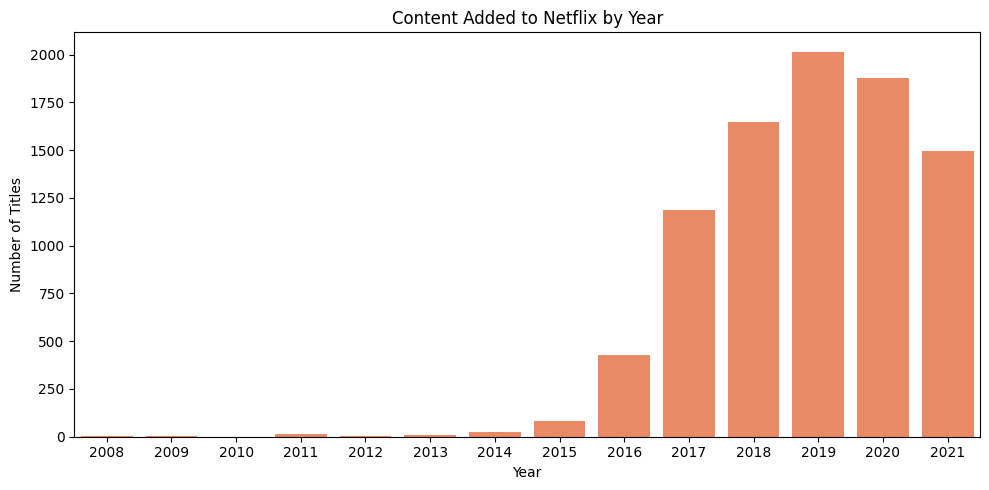

In [ ]:
#Which year saw the most content added.
content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=content_by_year.index, y=content_by_year.values, color='coral')
plt.title("Content Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

/tmp/ipython-input-63-4182768619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette="coolwarm")


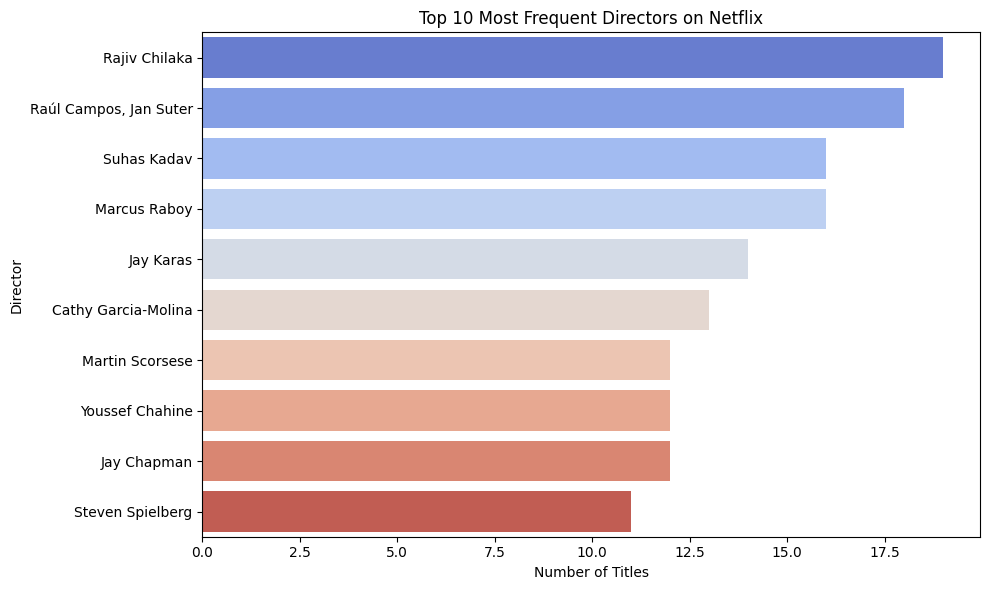

In [ ]:
#Frequent directors in Netflix
top_directors=df['director'].dropna().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette="coolwarm")
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

/tmp/ipython-input-64-3996612719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")


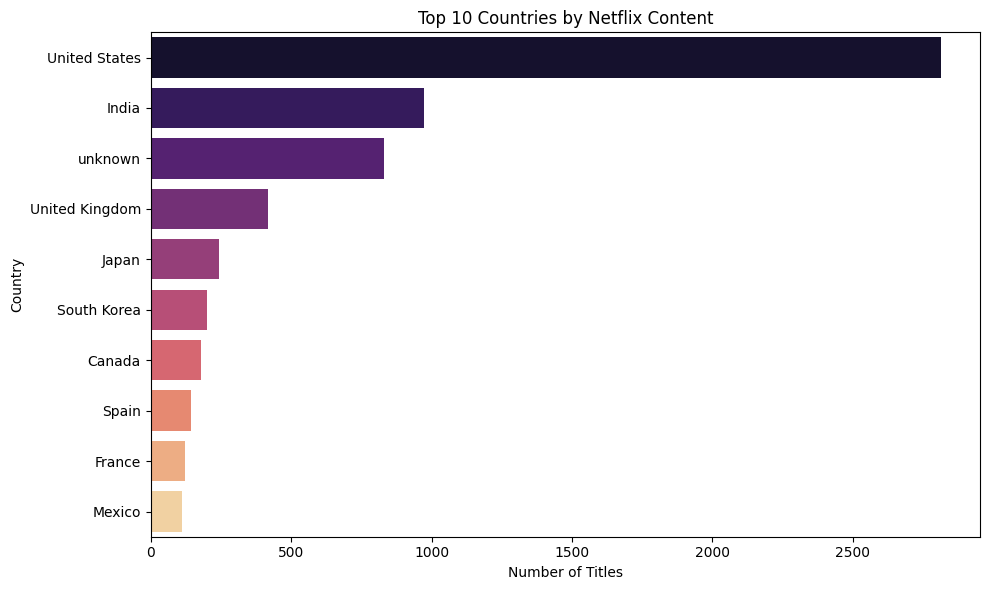

In [ ]:

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title("Top 10 Countries by Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## 🧠 Conclusions

- Netflix offers more Movies than TV Shows.
- Most content was added between 2017–2020.
- The most common genres include Dramas, Comedies, and Documentaries.
- USA is the top content-producing country on Netflix.


